# 1. IMPORT LIBRARY

In [19]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# 2. MASUKKAN DATASET HASIL SCRAPPING

In [20]:
df = pd.read_csv('Trailer-Final-Destination-Bloodlines.csv')
df.head()

,PublishedAt,Account,Comment,LikeCount
0,2025-04-05T06:55:04Z,@nicolas.marsicano,So as the grandma saved a lot of lives decades...,0
1,2025-04-05T06:07:22Z,@bonnnielin,oh how i’ve been craving for a new final desti...,0
2,2025-04-05T05:32:27Z,@BabaDongeng,"After saw FD1, i always carrefoul drive behind...",0
3,2025-04-05T05:02:23Z,@TheAdministratorSCPF,I don’t care how expensive ice is if glass sha...,0
4,2025-04-05T04:23:44Z,@sanketgavade8244,This movie make me overthink about every second..,0


# 3. DATA CLEANING

In [21]:
# Terdapat missing values pada fitur account
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PublishedAt  14843 non-null  object
 1   Account      14834 non-null  object
 2   Comment      14843 non-null  object
 3   LikeCount    14843 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 464.0+ KB


In [22]:
df.isnull().sum()

,0
PublishedAt,0
Account,9
Comment,0
LikeCount,0


In [23]:
missing_rows = df[df['Account'].isna()]
print(missing_rows)

                PublishedAt Account  \
1114   2025-03-29T19:32:46Z     NaN   
4827   2025-03-26T21:36:52Z     NaN   
4929   2025-03-26T20:56:06Z     NaN   
4931   2025-03-26T21:02:53Z     NaN   
7321   2025-03-26T07:23:41Z     NaN   
7436   2025-03-26T06:46:28Z     NaN   
7450   2025-03-26T06:44:01Z     NaN   
8472   2025-03-26T02:27:11Z     NaN   
12581  2025-03-25T17:20:11Z     NaN   

                                                 Comment  LikeCount  
1114   The van drove past him and startled him. Make ...          0  
4827                         I am so pumped for this !!!          0  
4929   EHHH ok<br>the last shot is out the first movi...          1  
4931   @@marcusmcgill4423 <br>the old movies are bett...          1  
7321                                 Promising trailer 👌          0  
7436         love you tony RIP he was great in star trek          1  
7450   Saw one franchise of FD when I was around 18 o...          0  
8472                          Amazing content as 

In [24]:
# Mengisi missing values dengan Unknown
df['Account'].fillna("Unknown", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PublishedAt  14843 non-null  object
 1   Account      14843 non-null  object
 2   Comment      14843 non-null  object
 3   LikeCount    14843 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 464.0+ KB


<ipython-input-24-34e5f8967c7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Account'].fillna("Unknown", inplace=True)


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.isnull().sum()

,0
PublishedAt,0
Account,0
Comment,0
LikeCount,0


In [27]:
# Mengubah tipe data object ke datetime fitur PublishedAt
df['PublishedAt'] = pd.to_datetime(df['PublishedAt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   PublishedAt  14843 non-null  datetime64[ns, UTC]
 1   Account      14843 non-null  object             
 2   Comment      14843 non-null  object             
 3   LikeCount    14843 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 464.0+ KB


# 4. PRE-PROCESSING TEXT

In [28]:
def cleaningText(text):
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = re.sub(r'<.*?>', ' ', text) # menghapus tag html
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text) # menghapus mention
    text = re.sub(r"http\S+", ' ', text) # menghapus link
    text = re.sub(r'[0-9]+', ' ', text) # menghapus angka
    text = re.sub(r'[^\w\s]', ' ', text) # menghapus karakter selain huruf dan angka

    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))) # menghapus semua tanda baca
    text = re.sub(r'\s+', ' ', text).strip() # Ubah spasi ganda jadi satu spasi saja
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

In [29]:
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('english'))
    listStopwords.update(listStopwords)

    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [30]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatizationText(text):
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [31]:
slangwords = {'gonna':'going to', 'gotta':'got to', 'bruh':'brother', 'bro':'brother',
              'bae':'baby', 'fam':'family', 'lit':'amazing', 'flex':'show off', 'dope':'awesome',
              'chill':'relax', 'sus':'suspicious', 'cap':'lie', 'noob':'beginner', 'lowkey':'secretly',
              'legit':'legitimate', 'tbh': 'to be honest', 'idk':'i dont know', 'lol':'laugh out loud',
              'omg':'oh my god', 'ngl':'not going to lie', 'btw':'by the way', 'imo':'in my opinion',
              'thx':'thanks', 'plz':'please', 'meh':'not interested', 'np':'no problem', 'tho':'though',
              'irl':'in real life', 'bout':'about', 'rip':'rest in peace', 'kudos':'praise', 'fd':'final destination',
              'u':'you', 'alway':'always','quot':'quote'}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [32]:
df['text_clean'] = df['Comment'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

df['text_lemmatized'] = df['text_stopword'].apply(lemmatizationText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_lemmatized'].apply(toSentence)

In [33]:
df.head()

,PublishedAt,Account,Comment,LikeCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,text_akhir
0,2025-04-05 06:55:04+00:00,@nicolas.marsicano,So as the grandma saved a lot of lives decades...,0,So as the grandma saved a lot of lives decades...,so as the grandma saved a lot of lives decades...,so as the grandma saved a lot of lives decades...,"[so, as, the, grandma, saved, a, lot, of, live...","[grandma, saved, lot, lives, decades, ago, sur...","[grandma, saved, lot, life, decade, ago, surel...",grandma saved lot life decade ago surely desce...
1,2025-04-05 06:07:22+00:00,@bonnnielin,oh how i’ve been craving for a new final desti...,0,oh how i ve been craving for a new final desti...,oh how i ve been craving for a new final desti...,oh how i ve been craving for a new final desti...,"[oh, how, i, ve, been, craving, for, a, new, f...","[oh, craving, new, final, destination, film]","[oh, craving, new, final, destination, film]",oh craving new final destination film
2,2025-04-05 05:32:27+00:00,@BabaDongeng,"After saw FD1, i always carrefoul drive behind...",0,After saw FD i always carrefoul drive behind n...,after saw fd i always carrefoul drive behind n...,after saw final destination i always carrefoul...,"[after, saw, final, destination, i, always, ca...","[saw, final, destination, always, carrefoul, d...","[saw, final, destination, always, carrefoul, d...",saw final destination always carrefoul drive b...
3,2025-04-05 05:02:23+00:00,@TheAdministratorSCPF,I don’t care how expensive ice is if glass sha...,0,I don t care how expensive ice is if glass sha...,i don t care how expensive ice is if glass sha...,i don t care how expensive ice is if glass sha...,"[i, don, t, care, how, expensive, ice, is, if,...","[care, expensive, ice, glass, shatters, around...","[care, expensive, ice, glass, shatters, around...",care expensive ice glass shatters around bet t...
4,2025-04-05 04:23:44+00:00,@sanketgavade8244,This movie make me overthink about every second..,0,This movie make me overthink about every second,this movie make me overthink about every second,this movie make me overthink about every second,"[this, movie, make, me, overthink, about, ever...","[movie, make, overthink, every, second]","[movie, make, overthink, every, second]",movie make overthink every second


# 5. Pelabelan

In [34]:
from textblob import TextBlob

def get_textblob_polarity(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob polarity function
df['polarity'] = df['text_akhir'].apply(get_textblob_polarity)
df.head()

,PublishedAt,Account,Comment,LikeCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,text_akhir,polarity
0,2025-04-05 06:55:04+00:00,@nicolas.marsicano,So as the grandma saved a lot of lives decades...,0,So as the grandma saved a lot of lives decades...,so as the grandma saved a lot of lives decades...,so as the grandma saved a lot of lives decades...,"[so, as, the, grandma, saved, a, lot, of, live...","[grandma, saved, lot, lives, decades, ago, sur...","[grandma, saved, lot, life, decade, ago, surel...",grandma saved lot life decade ago surely desce...,negative
1,2025-04-05 06:07:22+00:00,@bonnnielin,oh how i’ve been craving for a new final desti...,0,oh how i ve been craving for a new final desti...,oh how i ve been craving for a new final desti...,oh how i ve been craving for a new final desti...,"[oh, how, i, ve, been, craving, for, a, new, f...","[oh, craving, new, final, destination, film]","[oh, craving, new, final, destination, film]",oh craving new final destination film,positive
2,2025-04-05 05:32:27+00:00,@BabaDongeng,"After saw FD1, i always carrefoul drive behind...",0,After saw FD i always carrefoul drive behind n...,after saw fd i always carrefoul drive behind n...,after saw final destination i always carrefoul...,"[after, saw, final, destination, i, always, ca...","[saw, final, destination, always, carrefoul, d...","[saw, final, destination, always, carrefoul, d...",saw final destination always carrefoul drive b...,negative
3,2025-04-05 05:02:23+00:00,@TheAdministratorSCPF,I don’t care how expensive ice is if glass sha...,0,I don t care how expensive ice is if glass sha...,i don t care how expensive ice is if glass sha...,i don t care how expensive ice is if glass sha...,"[i, don, t, care, how, expensive, ice, is, if,...","[care, expensive, ice, glass, shatters, around...","[care, expensive, ice, glass, shatters, around...",care expensive ice glass shatters around bet t...,negative
4,2025-04-05 04:23:44+00:00,@sanketgavade8244,This movie make me overthink about every second..,0,This movie make me overthink about every second,this movie make me overthink about every second,this movie make me overthink about every second,"[this, movie, make, me, overthink, about, ever...","[movie, make, overthink, every, second]","[movie, make, overthink, every, second]",movie make overthink every second,neutral


In [35]:
df['polarity'].value_counts()

,count
polarity,
neutral,6648
positive,6368
negative,1827


# 6. Eksplorasi Label

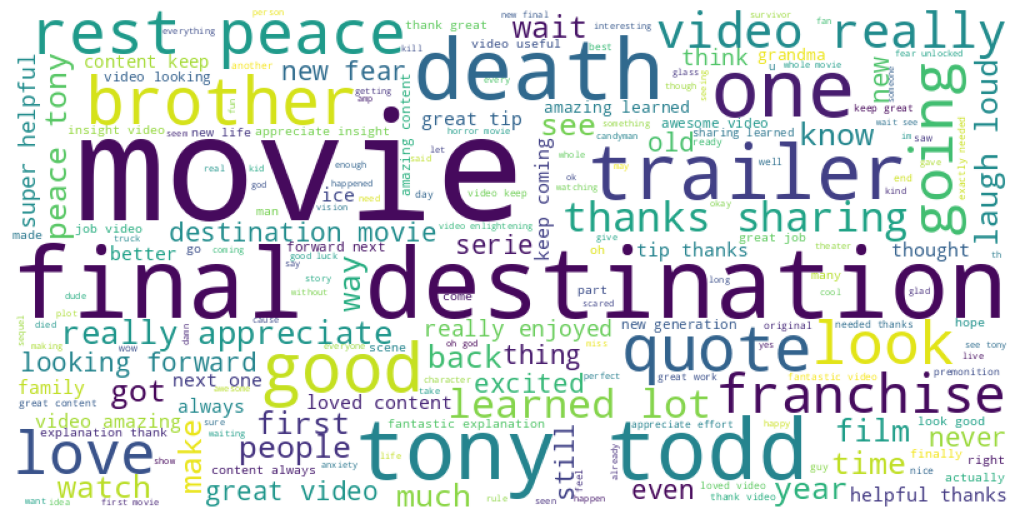

In [36]:
positive_comments = df[df['polarity'] == 'positive']['text_akhir']

# Combine all positive comments into a single string
all_positive_words = ' '.join(positive_comments)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_words)

# Display the generated image
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

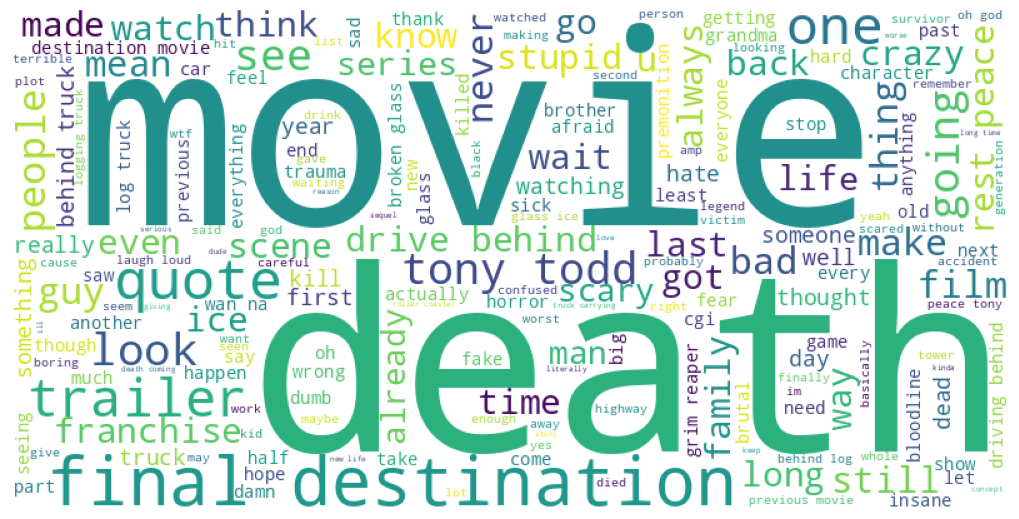

In [37]:
negative_comments = df[df['polarity'] == 'negative']['text_akhir']

# Combine all negative comments into a single string
all_negative_words = ' '.join(negative_comments)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_words)

# Display the generated image
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

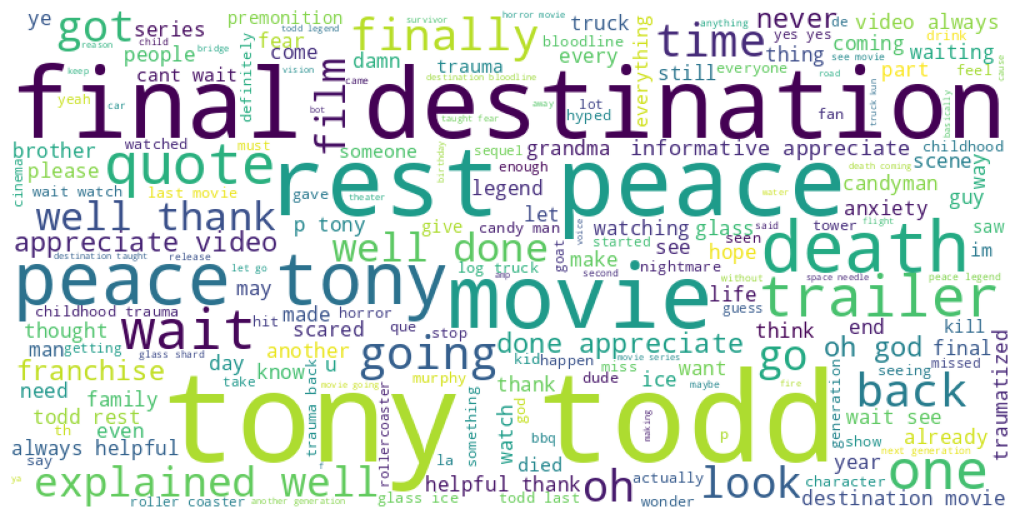

In [38]:
neutral_comments = df[df['polarity'] == 'neutral']['text_akhir']

# Combine all neutral comments into a single string
all_neutral_words = ' '.join(neutral_comments)

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_neutral_words)

# Display the generated image
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 7. Data Splitting dan Ekstraksi Fitur dengan Bag of Words dan TF-IDF

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = df['text_akhir']
y = df['polarity']

# Ekstraksi fitur dengan Bag of Words
vectorizer = CountVectorizer(max_features=3500, min_df=17, max_df=0.8)
X = vectorizer.fit_transform(X)

# Data Splitting
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X, y, test_size=0.2, random_state=seed)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['text_akhir']
y = df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=3500, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 8. Modeling

In [41]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes_bow = BernoulliNB()
naive_bayes_tfidf = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes_bow.fit(X_train_bow.toarray(), y_train_bow) # fit bow model
naive_bayes_tfidf.fit(X_train_tfidf.toarray(), y_train_tfidf) # fit tfidf model


# Prediksi sentimen pada data pelatihan dan data uji bow
y_pred_train_nb_bow = naive_bayes_bow.predict(X_train_bow.toarray()) # predict using bow model
y_pred_test_nb_bow = naive_bayes_bow.predict(X_test_bow.toarray()) # predict using bow model

# Prediksi sentimen pada data pelatihan dan data uji tf-idf
y_pred_train_nb_tfidf = naive_bayes_tfidf.predict(X_train_tfidf.toarray()) # predict using tfidf model
y_pred_test_nb_tfidf = naive_bayes_tfidf.predict(X_test_tfidf.toarray()) # predict using tfidf model

# Evaluasi akurasi model Naive Bayes dg metode ekstraksi Bow
accuracy_train_nb_bow = accuracy_score(y_pred_train_nb_bow, y_train_bow) # evaluate bow model
accuracy_test_nb_bow = accuracy_score(y_pred_test_nb_bow, y_test_bow) # evaluate bow model

# Evaluasi akurasi model Naive Bayes dg metode ekstraksi tf-idf
accuracy_train_nb_tfidf = accuracy_score(y_pred_train_nb_tfidf, y_train_tfidf)
accuracy_test_nb_tfidf = accuracy_score(y_pred_test_nb_tfidf, y_test_tfidf)

# Menampilkan akurasi utk bow
print('Ektraksi Fitur Bag of Words:')
print('Naive Bayes - accuracy_train:', accuracy_train_nb_bow)
print('Naive Bayes - accuracy_test:', accuracy_test_nb_bow)

# Menampilkan akurasi utk tf-idf
print('Ektraksi Fitur TF-IDF:')
print('Naive Bayes - accuracy_train:', accuracy_train_nb_tfidf)
print('Naive Bayes - accuracy_test:', accuracy_test_nb_tfidf)

Ektraksi Fitur Bag of Words:
Naive Bayes - accuracy_train: 0.853966649823143
Naive Bayes - accuracy_test: 0.8299090602896598
Ektraksi Fitur TF-IDF:
Naive Bayes - accuracy_train: 0.8516085565100219
Naive Bayes - accuracy_test: 0.8302458740316605


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest_bow = RandomForestClassifier()
random_forest_tfidf = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest_bow.fit(X_train_bow.toarray(), y_train_bow)

random_forest_tfidf.fit(X_train_tfidf.toarray(), y_train_tfidf)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf_bow = random_forest_bow.predict(X_train_bow.toarray())
y_pred_test_rf_bow = random_forest_bow.predict(X_test_bow.toarray())

y_pred_train_rf_tfidf = random_forest_tfidf.predict(X_train_tfidf.toarray())
y_pred_test_rf_tfidf = random_forest_tfidf.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_bow = accuracy_score(y_pred_train_rf_bow, y_train_bow)
accuracy_test_rf_bow = accuracy_score(y_pred_test_rf_bow, y_test_bow)

accuracy_train_rf_tfidf = accuracy_score(y_pred_train_rf_tfidf, y_train_tfidf)
accuracy_test_rf_tfidf = accuracy_score(y_pred_test_rf_tfidf, y_test_tfidf)

# Menampilkan akurasi utk bow
print('Ektraksi Fitur Bag of Words:')
print('Random Forest - accuracy_train:', accuracy_train_rf_bow)
print('Random Forest - accuracy_test:', accuracy_test_rf_bow)

# Menampilkan akurasi utk tf-idf
print('Ektraksi Fitur TF-IDF:')
print('Random Forest - accuracy_train:', accuracy_train_rf_tfidf)
print('Random Forest - accuracy_test:', accuracy_test_rf_tfidf)

Ektraksi Fitur Bag of Words:
Random Forest - accuracy_train: 0.9908202796024929
Random Forest - accuracy_test: 0.9043448972718087
Ektraksi Fitur TF-IDF:
Random Forest - accuracy_train: 0.9898096681825838
Random Forest - accuracy_test: 0.9083866621758168


In [43]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression_bow = LogisticRegression()
logistic_regression_tfidf = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_bow.fit(X_train_bow.toarray(), y_train_bow)
logistic_regression_tfidf.fit(X_train_tfidf.toarray(), y_train_tfidf)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr_bow = logistic_regression_bow.predict(X_train_bow.toarray())
y_pred_test_lr_bow = logistic_regression_bow.predict(X_test_bow.toarray())

y_pred_train_lr_tfidf = logistic_regression_tfidf.predict(X_train_tfidf.toarray())
y_pred_test_lr_tfidf = logistic_regression_tfidf.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr_bow = accuracy_score(y_pred_train_lr_bow, y_train_bow)
accuracy_train_lr_tfidf = accuracy_score(y_pred_train_lr_tfidf, y_train_tfidf)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr_bow = accuracy_score(y_pred_test_lr_bow, y_test_bow)
accuracy_test_lr_tfidf = accuracy_score(y_pred_test_lr_tfidf, y_test_tfidf)

# Menampilkan akurasi utk bag of words
print('Ektraksi Fitur Bag of Words:')
print('Logistic Regression - accuracy_train:', accuracy_train_lr_bow)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_bow)

# Menampilkan akurasi utk tf-idf
print('Ektraksi Fitur TF-IDF:')
print('Logistic Regression - accuracy_train:', accuracy_train_lr_tfidf)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_tfidf)

Ektraksi Fitur Bag of Words:
Logistic Regression - accuracy_train: 0.9466060299814721
Logistic Regression - accuracy_test: 0.920511956887841
Ektraksi Fitur TF-IDF:
Logistic Regression - accuracy_train: 0.9291729829880411
Logistic Regression - accuracy_test: 0.9107443583698215


In [44]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree_bow = DecisionTreeClassifier(random_state=42)
decision_tree_tfidf = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree pada data pelatihan
decision_tree_bow.fit(X_train_bow.toarray(), y_train_bow)
decision_tree_tfidf.fit(X_train_tfidf.toarray(), y_train_tfidf)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt_bow = decision_tree_bow.predict(X_train_bow.toarray())
y_pred_test_dt_bow = decision_tree_bow.predict(X_test_bow.toarray())

y_pred_train_dt_tfidf = decision_tree_tfidf.predict(X_train_tfidf.toarray())
y_pred_test_dt_tfidf = decision_tree_tfidf.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt_bow = accuracy_score(y_pred_train_dt_bow, y_train_bow)
accuracy_test_dt_bow = accuracy_score(y_pred_test_dt_bow, y_test_bow)

accuracy_train_dt_tfidf = accuracy_score(y_pred_train_dt_tfidf, y_train_tfidf)
accuracy_test_dt_tfidf = accuracy_score(y_pred_test_dt_tfidf, y_test_tfidf)

# Menampilkan akurasi utk bag of words
print('Ektraksi Fitur Bag of Words:')
print('Decision Tree - accuracy_train:', accuracy_train_dt_bow)
print('Decision Tree - accuracy_test:', accuracy_test_dt_bow)

# Menampilkan akurasi utk tf-idf
print('Ektraksi Fitur TF-IDF:')
print('Decision Tree - accuracy_train:', accuracy_train_dt_tfidf)
print('Decision Tree - accuracy_test:', accuracy_test_dt_tfidf)

Ektraksi Fitur Bag of Words:
Decision Tree - accuracy_train: 0.9908202796024929
Decision Tree - accuracy_test: 0.8800943078477602
Ektraksi Fitur TF-IDF:
Decision Tree - accuracy_train: 0.9898096681825838
Decision Tree - accuracy_test: 0.8905355338497811


In [45]:
from sklearn.svm import SVC

# SVC with Bag of Words
svc_bow = SVC()
svc_bow.fit(X_train_bow.toarray(), y_train_bow)
y_pred_train_svc_bow = svc_bow.predict(X_train_bow.toarray())
y_pred_test_svc_bow = svc_bow.predict(X_test_bow.toarray())
accuracy_train_svc_bow = accuracy_score(y_pred_train_svc_bow, y_train_bow)
accuracy_test_svc_bow = accuracy_score(y_pred_test_svc_bow, y_test_bow)

print('Ektraksi Fitur Bag of Words:')
print('SVC - accuracy_train:', accuracy_train_svc_bow)
print('SVC - accuracy_test:', accuracy_test_svc_bow)

# SVC with TF-IDF
svc_tfidf = SVC()
svc_tfidf.fit(X_train_tfidf.toarray(), y_train_tfidf)
y_pred_train_svc_tfidf = svc_tfidf.predict(X_train_tfidf.toarray())
y_pred_test_svc_tfidf = svc_tfidf.predict(X_test_tfidf.toarray())
accuracy_train_svc_tfidf = accuracy_score(y_pred_train_svc_tfidf, y_train_tfidf)
accuracy_test_svc_tfidf = accuracy_score(y_pred_test_svc_tfidf, y_test_tfidf)

print('Ektraksi Fitur TF-IDF:')
print('SVC - accuracy_train:', accuracy_train_svc_tfidf)
print('SVC - accuracy_test:', accuracy_test_svc_tfidf)

Ektraksi Fitur Bag of Words:
SVC - accuracy_train: 0.9395317500421088
SVC - accuracy_test: 0.8992926911417986
Ektraksi Fitur TF-IDF:
SVC - accuracy_train: 0.9630284655549941
SVC - accuracy_test: 0.9110811721118222


# 9. Analisis Sentimen

- Sentimen publik terhadap trailer Final Destination paling banyak merupakan sentimen netral (6.648 komentar). Meskipun angkanya tidak jauh berbeda dengan sentimen positif (6.368 komentar). Lalu, sentimen negatif (1.827 komentar) merupakan yang paling sedikit.


# 10. Analisis Ektraksi Fitur dan Pemodelan Algoritma

**- Algoritma Naive Bayes:**
  - Akurasi data testing dan data training pada TF-IDF lebih baik daripada BoW.
  - Berikut ini merupakan hasil akurasi menggunakan kedua jenis ekstraksi fitur:
    -   Ektraksi Fitur dg **Bag of Words**:
      - Akurasi data train: 84.17%
      - Akurasi data test: 	79.72%
    - Ektraksi Fitur dg **TF-IDF**:
      - Akurasi data train: 85.16%
      - Akurasi data test: 83.02%
<br>
<br>

**- Algoritma Random Forest:**
  - Baik BoW maupun TF-IDF menghasilkan akurasi yang sangat tinggi, di atas 90% pada testing, yang menandakan bahwa model Random Forest bekerja dengan sangat baik pada data ini.
  - Terdapat indikasi overfitting pada data train.
  - Berikut ini merupakan hasil akurasi menggunakan kedua jenis ekstraksi fitur:
    -   Ektraksi Fitur **Bag of Words**:
      - Akurasi data train: 	99.08%
      - Akurasi data test: 90.23%
    - Ektraksi Fitur **TF-IDF**:
      - Akurasi data train: 98.98%
      - Akurasi data test: 	90.77%
<br>
<br>

**- Algoritma Logistic Regression:**
  - Pada Logistic Regression, metode BoW lebih baik daripada TF-IDF, baik di data training maupun testing.
  - Berikut ini merupakan hasil akurasi menggunakan kedua jenis ekstraksi fitur:
    -   Ektraksi Fitur **Bag of Words**:
      - Akurasi data train: 	94.66%
      - Akurasi data test: 92.05%
    - Ektraksi Fitur **TF-IDF**:
      - Akurasi data train: 92.94%
      - Akurasi data test: 	91.21%
<br>
<br>

**- Algoritma Decision Tree:**
  - Pada Logistic Regression, akurasi testing sedikit lebih tinggi pada TF-IDF dibanding BoW.
  - Terdpat indikasi overfitting pada data train.
  - Berikut ini merupakan hasil akurasi menggunakan kedua jenis ekstraksi fitur:
    -   Ektraksi Fitur **Bag of Words**:
      - Akurasi data train: 	99.08%
      - Akurasi data test: 87.74%
    - Ektraksi Fitur **TF-IDF**:
      - Akurasi data train: 98.98%
      - Akurasi data test: 	88.75%
<br>
<br>

**- Algoritma SVC:**
  - Pada Support Vector Classifier, akurasi testing dan training lebih baik TF-IDF daripada BoW.
  - Berikut ini merupakan hasil akurasi menggunakan kedua jenis ekstraksi fitur:
    -   Ektraksi Fitur **Bag of Words**:
      - Akurasi data train: 	93.94%
      - Akurasi data test: 89.96%
    - Ektraksi Fitur **TF-IDF**:
      - Akurasi data train: 96.30%
      - Akurasi data test: 	91.14%

# 10. Kesimpulan

- Model terbaik secara umum merupakan logistic regression dengan ekstraksi fitur BoW yang memiliki akurasi test sebesar 92.05%.
- Ekstraksi fitur terbaik adalah TF-IDF karena pada sebagian besar model, TF-IDF lebih baik daripada BoW.
- Beberapa model perlu lebih diperhatikan karena overfitting pada data trainingnya. Contohnya seperti Decision Tree dan Random Forest.

In [46]:
!pip freeze > requirements.txt

In [47]:
from google.colab import files
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>